In [2]:
# read code tools
# share in https://gist.github.com/WuShaogui/19c690bde2a0fe70b061d50e20129531
import sys
import os.path as osp
sys.path.append('/home/wushaogui/ReadCode/')
from my_read_code_tools import *

# 对ORB描述符进行蛮力匹配

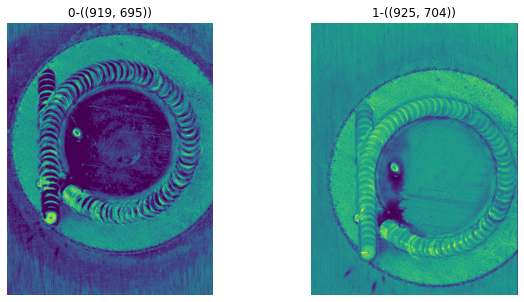

In [44]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/13 下午4:00
# @Author  : play4fun
# @File    : 37.2-对ORB描述符进行蛮力匹配.py
# @Software: PyCharm

"""
37.2-对ORB描述符进行蛮力匹配.py:
匹配器对象是什么
matches = bf.match(des1, des2) 返回值是一个 DMatch对象列表
DMatch 对 具有下列属性
• DMatch.distance - 描 符之 的 离。 小 好。
• DMatch.trainIdx - 目标图像中描 符的索引。
• DMatch.queryIdx - 查 图像中描 符的索引。
• DMatch.imgIdx - 目标图像的索引。
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('pic1.png', 0)  # queryImage
img2 = cv2.imread('pic2.png', 0)  # trainImage
show_images([img1,img2])

In [45]:
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


In [47]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1, des2)

In [27]:
pts1=[]
pts2=[]
# for idx in range(len(matches)):
for idx in range(3): # 收集3个点计算仿射变换矩阵
    trainIdx=matches[idx].trainIdx
    queryIdx=matches[idx].queryIdx
    
    train_keypoint=kp1[trainIdx]
    query_keypoint=kp2[queryIdx]
    print(train_keypoint.pt,query_keypoint.pt)
    
    pts1.append(list(query_keypoint.pt))
    pts2.append(list(train_keypoint.pt))


(154.07681274414062, 537.477294921875) (428.4000244140625, 158.40000915527344)
(231.0, 369.0) (283.0, 863.0)
(302.4000244140625, 601.2000122070312) (150.0, 655.2000122070312)


In [28]:
rows, cols = img2.shape
# pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
# pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
pts1 = np.float32(pts1)
pts2 = np.float32(pts2)

M = cv2.getAffineTransform(pts1, pts2)
print(M)


[[-5.34941300e-01 -1.21670580e-03  3.83438405e+02]
 [-1.03770498e+00 -4.53249544e-01  1.05382487e+03]]


In [30]:
M[0][1]=0
M[1][0]=0
print(M)

[[-5.34941300e-01  0.00000000e+00  3.83438405e+02]
 [ 0.00000000e+00 -4.53249544e-01  1.05382487e+03]]


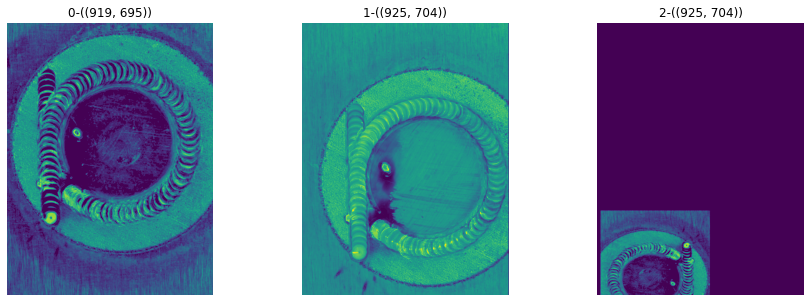

In [31]:
dst = cv2.warpAffine(img1, M, (cols, rows))

show_images([img1,img2,dst])

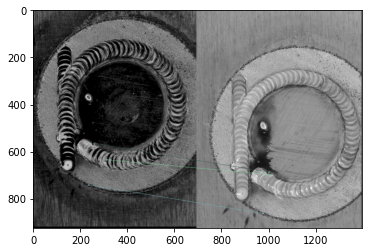

True

In [34]:
# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 10 matches.
# img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], flags=2)  # 前10个匹配
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:3], None,flags=2)  # 前10个匹配

plt.imshow(img3), plt.show()
cv2.imwrite('output.png',img3)

# SIFT_match

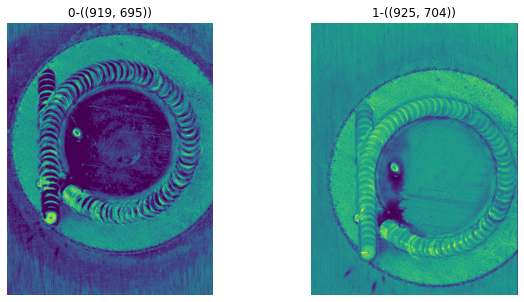

In [48]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('pic1.png', 0)
# queryImage
img2 = cv2.imread('pic2.png', 0)  # trainImage

show_images([img1,img2])

In [49]:
# Initiate SIFT detector
# sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()


# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)


In [50]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [53]:
# Apply ratio test
# 比值测试，首先获取与 A距离最近的点 B （最近）和 C （次近），
# 只有当 B/C 小于阀值时（0.75）才被认为是匹配，
# 因为假设匹配是一一对应的，真正的匹配的理想距离为0
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

In [55]:
print(len(good),len(good[0]))

293 1


In [67]:
pts1=[]
pts2=[]
idxs = list(range(len(good)))
np.random.shuffle(idxs)
print(idxs)
# for idx in range(len(matches)):
for idx in idxs[:3]: # 收集3个点计算仿射变换矩阵
    trainIdx=good[idx][0].trainIdx
    queryIdx=good[idx][0].queryIdx
    print(trainIdx,queryIdx)
    train_keypoint=kp1[queryIdx]
    query_keypoint=kp2[trainIdx]
    print(train_keypoint.pt)
    print(query_keypoint.pt)
    
    pts1.append(list(train_keypoint.pt))
    pts2.append(list(query_keypoint.pt))

[12, 135, 199, 146, 283, 154, 236, 273, 175, 16, 117, 1, 258, 165, 108, 32, 35, 96, 26, 262, 9, 128, 224, 245, 191, 120, 256, 253, 97, 166, 75, 36, 40, 99, 17, 130, 30, 6, 226, 33, 81, 288, 48, 167, 122, 276, 23, 147, 92, 142, 114, 247, 172, 13, 237, 279, 80, 100, 248, 218, 189, 196, 110, 229, 251, 61, 292, 136, 177, 28, 289, 227, 272, 257, 124, 184, 233, 88, 176, 291, 145, 266, 192, 156, 163, 101, 150, 5, 159, 274, 105, 230, 91, 269, 0, 193, 115, 200, 60, 111, 106, 65, 38, 252, 73, 98, 280, 87, 43, 241, 221, 24, 2, 186, 57, 198, 278, 22, 76, 250, 216, 29, 171, 86, 85, 181, 15, 239, 178, 169, 95, 259, 219, 84, 222, 201, 206, 39, 231, 139, 264, 77, 134, 161, 173, 228, 8, 141, 112, 119, 208, 45, 4, 127, 265, 244, 255, 217, 102, 207, 121, 261, 232, 72, 235, 53, 263, 46, 149, 129, 123, 275, 54, 285, 225, 182, 83, 82, 234, 268, 55, 148, 282, 197, 260, 41, 144, 126, 290, 168, 160, 180, 42, 202, 3, 37, 215, 131, 107, 223, 155, 27, 89, 90, 94, 243, 14, 31, 190, 68, 52, 64, 140, 195, 18, 212, 5

In [68]:
rows, cols = img1.shape
# pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
# pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
pts1 = np.float32(pts1)
pts2 = np.float32(pts2)

M = cv2.getAffineTransform(pts1, pts2)
print(M)

[[ 1.00337680e+00 -3.44726350e-03  4.69758151e+01]
 [-1.38598832e-04  1.00410598e+00  1.18734008e+02]]


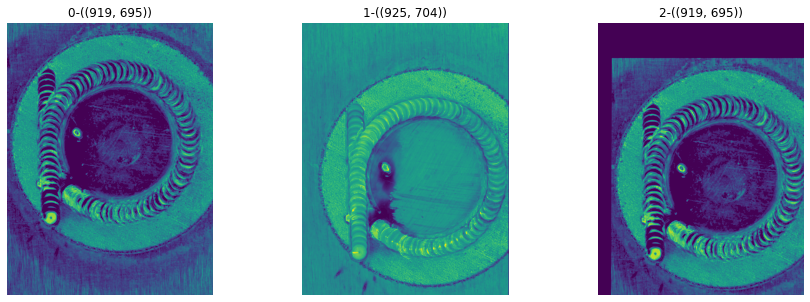

In [69]:
dst = cv2.warpAffine(img1, M, (cols, rows))

show_images([img1,img2,dst])

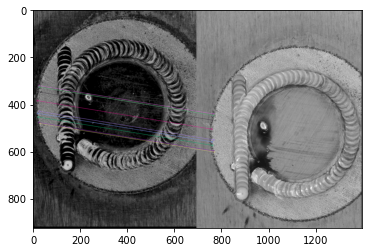

True

In [52]:
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = np.ndarray([2, 2])
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good[:10], img3, flags=2)

# cv2.drawMatchesKnn expects list of lists as matches.
# img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.imshow(img3), plt.show()
cv2.imwrite('output.png',img3)

# FLANN匹配器

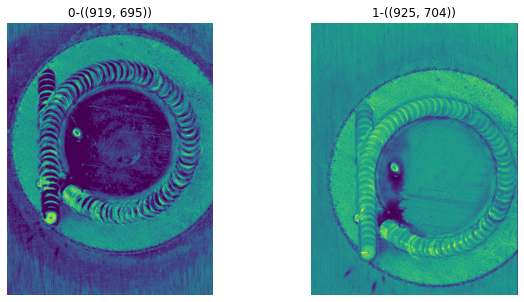

In [35]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('pic1.png', 0)  # queryImage
img2 = cv2.imread('pic2.png', 0)  # trainImage

show_images([img1,img2])

In [36]:
# Initiate SIFT detector
# sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

[ WARN:0] global /tmp/pip-req-build-vrhoqk3o/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (13) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [37]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]

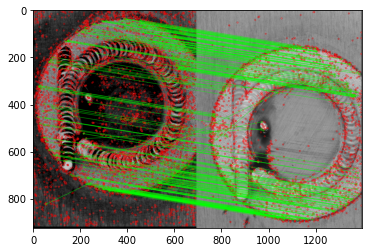

True

In [38]:
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=0)

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

plt.imshow(img3, ), plt.show()
cv2.imwrite('output.png',img3)

# 整合流程

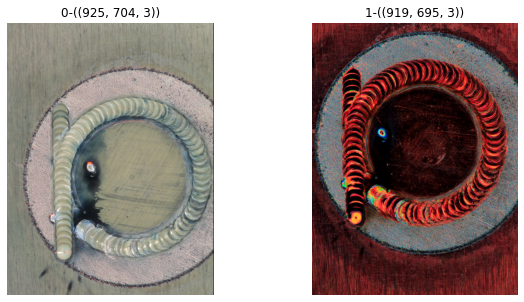

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('pic1.png')
# queryImage
img2 = cv2.imread('pic2.png')  # trainImage

show_images([img1,img2[...,::-1]])

In [4]:
gray1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()


# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

[ WARN:0] global /tmp/pip-req-build-vrhoqk3o/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (13) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [5]:
# Apply ratio test
# 比值测试，首先获取与 A距离最近的点 B （最近）和 C （次近），
# 只有当 B/C 小于阀值时（0.75）才被认为是匹配，
# 因为假设匹配是一一对应的，真正的匹配的理想距离为0
good = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:
        good.append([m])

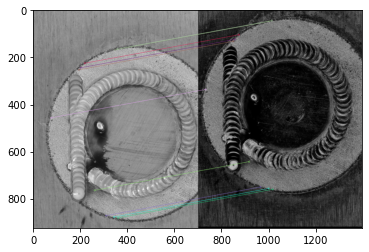

(<matplotlib.image.AxesImage at 0x7f13d065f390>, None)

In [6]:
# cv2.drawMatchesKnn expects list of lists as matches.
gray = np.ndarray([2, 2])
gray = cv2.drawMatchesKnn(gray1, kp1, gray2, kp2, good[:10], gray, flags=2)

# cv2.drawMatchesKnn expects list of lists as matches.
# gray3 = cv2.drawMatchesKnn(gray1,kp1,gray2,kp2,good,None,flags=2)

plt.imshow(gray), plt.show()

In [7]:
pts1=[]
pts2=[]
idxs = list(range(len(good)))
np.random.shuffle(idxs)

# for idx in range(len(matches)):
for idx in idxs[:3]: # 收集3个点计算仿射变换矩阵
    trainIdx=good[idx][0].trainIdx
    queryIdx=good[idx][0].queryIdx

    train_keypoint=kp1[queryIdx]
    query_keypoint=kp2[trainIdx]
    
    pts1.append(list(train_keypoint.pt))
    pts2.append(list(query_keypoint.pt))

[[ 9.94932478e-01 -2.89175300e-03 -4.20902920e+01]
 [ 6.78190250e-03  1.00916461e+00 -1.31636535e+02]]


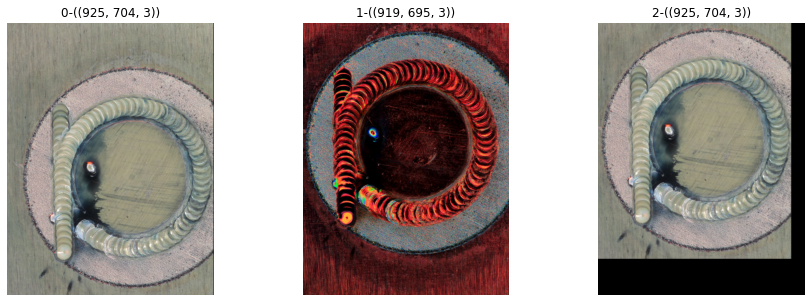

In [8]:
rows, cols, ch = img1.shape
pts1 = np.float32(pts1)
pts2 = np.float32(pts2)

M = cv2.getAffineTransform(pts1, pts2)
print(M)
if M[0][1]>0.5 or M[1][0]>0.5:
    print('仿射矩阵出现旋转')
else:
    M[0][1]=0
    M[1][0]=0
dst = cv2.warpAffine(img1, M, (cols, rows))

show_images([img1,img2[...,::-1],dst])

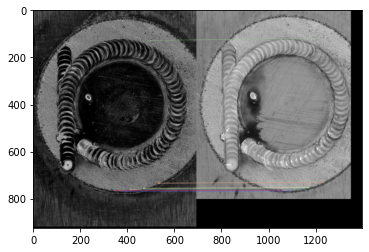

True

In [10]:
gray3=cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()


# find the keypoints and descriptors with SIFT
kp2, des2 = sift.detectAndCompute(gray2, None)
kp3, des3 = sift.detectAndCompute(gray3, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des2, des3, k=2)

# Apply ratio test
# 比值测试，首先获取与 A距离最近的点 B （最近）和 C （次近），
# 只有当 B/C 小于阀值时（0.75）才被认为是匹配，
# 因为假设匹配是一一对应的，真正的匹配的理想距离为0
good = []
for m, n in matches:
    if m.distance < 0.45 * n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
gray = np.ndarray([2, 2])
gray = cv2.drawMatchesKnn(gray2, kp2, gray3, kp3, good[:10], gray, flags=2)

# cv2.drawMatchesKnn expects list of lists as matches.
# gray3 = cv2.drawMatchesKnn(gray1,kp1,gray2,kp2,good,None,flags=2)

plt.imshow(gray), plt.show()
cv2.imwrite('output.png',gray)